In [1]:
%pylab inline
from pathlib import Path
import sys
path_to_script =  Path("~/projects/scaffan/").expanduser()
sys.path.insert(0,str(path_to_script))
import scaffan
import io3d # just to get data
import scaffan.image as scim

Populating the interactive namespace from numpy and matplotlib
add path C:\Users\Jirik\Downloads\openslide-win64-20171122\bin


# Get the data

In [2]:
# io3d.datasets.download("SCP003", dry_run=True)
fn = io3d.datasets.join_path("medical", "orig", "sample_data", "SCP003", "SCP003.ndpi", get_root=True)
print(f"filename: {fn}")

2020-03-28 08:50:36.191 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-03-28 08:50:36.284 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_.
2020-03-28 08:50:36.289 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical
2020-03-28 08:50:36.293 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig
2020-03-28 08:50:36.302 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig/sample_data
2020-03-28 08:50:36.307 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig/sample_data/SCP003
2020-03-28 08:50:36.311 | DEBUG    | io3d.datasets:join_path:303 - sample_data_pathC:\Users\Jirik\data
2020-03-28 08:50:36.315 | DEBUG    | io3d.datasets:join_path:304 - path C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi


filename: C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi


# Read annotated image

In [3]:
# fn = io3d.datasets.join_path("medical", "orig", "CMU-1.ndpi", get_root=True)
anim = scim.AnnotatedImage(fn)

2020-03-28 08:50:36.340 | DEBUG    | scaffan.image:__init__:203 - fs_enc: utf-8
2020-03-28 08:50:36.345 | DEBUG    | scaffan.image:__init__:204 - Reading file C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi
2020-03-28 08:50:36.370 | DEBUG    | scaffan.image:read_annotations:309 - Reading the annotation C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi
2020-03-28 08:50:39.201 | DEBUG    | scaffan.annotation:read_annotations:122 - windows annotation output:b'\x1b2020-03-28 08:50:38.876\x1b | \x1b\x1bDEBUG   \x1b | \x1bscaffan.annotation\x1b:\x1bndpa_to_json\x1b:\x1b72\x1b - \x1b\x1bPATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\x1b\r\n'


# Views

The View is extracted from an annotated image by center or location (upper left corner). Additional information is size of
view in pixels or in mm. A [openslide](https://openslide.org/api/python/) package is called in background.

## Get grayscale image by center

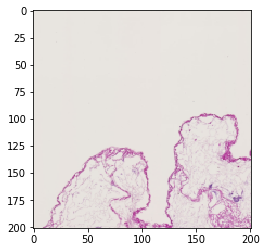

In [4]:
pixelsize_mm = [0.005, 0.005]

view = anim.get_view(center=(16000,10000), size_mm=[1, 1], pixelsize_mm=pixelsize_mm)
img = view.get_region_image(as_gray=False)
plt.imshow(img)
# view = anim.get_views(ann_ids, pixelsize_mm=pixelsize_mm)[0]



## Get grayscale image by annotation color

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25, 26, 28, 33]


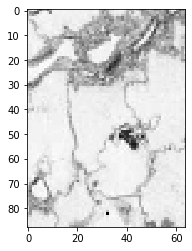

In [5]:
ann_ids = anim.select_annotations_by_color("#000000")
print(ann_ids)
view = anim.get_views(ann_ids, level=7)[0]
img = view.get_region_image(as_gray=True)
plt.imshow(img, cmap='gray')

## Change one view into other view

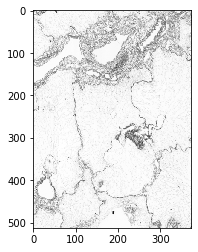

In [6]:
detail_view = view.to_pixelsize(pixelsize_mm=[0.005, 0.005])
img = detail_view.get_region_image(as_gray=True)
plt.imshow(img, cmap='gray')

# Annotations

In [9]:
# ann_ids = anim.select_annotations_by_color("#000000")
ann_ids = anim.select_annotations_by_title("raindrop")
print(ann_ids)
view = anim.get_views(ann_ids, level=7)[0]

[2]


## Show annotation

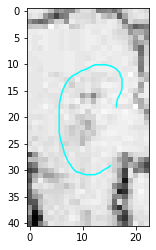

In [10]:

img = view.get_region_image(as_gray=True)

plt.imshow(img, cmap='gray')
view.plot_annotations(ann_ids[0])


## Get annotation raster

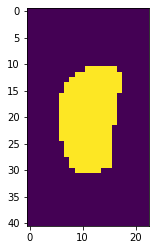

In [11]:
img_ann = view.get_annotation_region_raster(ann_ids[0])
plt.imshow(img_ann)

## Work with inner and outer annotations

There is a way how to find surrounding annotation to actual annotation.

### Related to single annotation

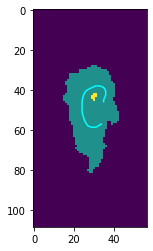

In [29]:
ann_outer = anim.select_outer_annotations(ann_ids[0])
ann_inner = anim.select_inner_annotations(ann_ids[0])

# visualization
view_outer = anim.get_view(annotation_id=ann_outer[0], level=7)
img_ann_outer = view_outer.get_annotation_region_raster(ann_outer[0])
img_ann_inner = view_outer.get_annotation_region_raster(ann_inner[0])
plt.imshow(img_ann_inner.astype(np.uint8) + img_ann_outer.astype(np.uint8))
# plt.colorbar()
# view_outer
view_outer.plot_annotations(ann_ids[0])

### In whole image

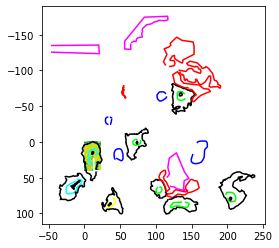

In [40]:
# drow according to view
plt.imshow(img)
view.plot_annotations()

In [41]:
outer_ids, holes_ids = anim.select_just_outer_annotations(color="#000000")
outer_ids

[10, 12, 14, 16, 18, 19, 25, 33]

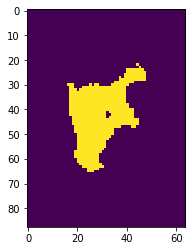

In [39]:
view_black0 = anim.get_view(annotation_id=outer_ids[0], level=7)
ann_raster_with_holes = view_black0.get_annotation_region_raster(outer_ids[0], holes_ids=holes_ids[0], annotation_id)
plt.imshow(ann_raster_with_holes)

## Get title and details

In [17]:
for i, ann in enumerate(anim.annotations):
    if len(ann["title"]) > 0:
        print(f"{i}: {ann['title']}")


2: raindrop
5: AN1
20: septum
21: septum
22: septum
23: septum
27: empty
29: empty
34: small
35: test1
36: test2


In [16]:

for i, ann in enumerate(anim.annotations):
    if len(ann["details"]) > 0:
        print(f"{i}: {ann['details']}")

0: PFCVI=2 SNI=1 SWP=1 CMP=0.5 SQZ=0.5
1: SNI=1.0 CMP=0.7
2: PFCVI=2 SNI=1.5 SWP=1  SQZ=0.3 IFE=0 CVM=0
3: PFCVI=2 SNI=1 SWP=1 CMP=0.6
4: SNI=1.0 CMP=0.7
5: PFCVI=2 SNI=2 SWP=1  CMP=0.8
6: SNI=1.5 CMP=0.6
7: PFCVI=2 SNI=1.5 SWP=1  SQZ=0.3
8: PFCVI=2 SNI=1 SWP=1  SQZ=0.4 IFE=0.5
9: SNI=0.5 SQZ=0.5 IFE=0 CVM=0
34: IFE=0.3 CVM=0 SNI=1.8
